# Regional Government of Lima 
https://www.datosabiertos.gob.pe/group/gobierno-regional-de-lima

## Investment Projects of the Regional Government of Lima 
https://www.datosabiertos.gob.pe/dataset/proyectos-de-inversi%C3%B3n-del-gobierno-regional-de-lima

### Dataset Description:
List of investment projects of the Regional Government of Lima. 

#### This dataset is characterized by: 
- Cut-off date of the information
- Unique Investment Code 
- Sector to which the investment belongs 
- Multiannual Investment Programming Office to which the investment belongs 
- Responsible Formulation Unit
- Responsible Investment Execution Unit
- Geographic Location Code, 
- Department in which it is find the investment
- Province in which the investment is located
- Function to which the investment belongs
- Type of the Investment
- Name of the Investment
- Updated Cost of the investment
- Accumulated Earnings as of 2021 of the investment
- Modified Institutional Budget of the investment
- Scheduled amount for the year 2022 of the investment
- Scheduled amount for the year 2023 of the Investment
- Scheduled amount for the year 2024 of the investment
- Scheduled amount for the year 2025 of the investment

**Note:**
* (OPMI) - "Municipality Multiannual Investment Programming Office" of a Local Government is the technical body responsible for the multiannual programming phase of the investment cycle in the field of local functional responsibility.
* Formulating Units (UF) or Investment Executing Unit (UEI)
* (PIM) - "Modified Institutional Budget" is the updated budget of the public entity as a result of the budget modifications, both at the institutional level and at the programmatic functional level, made during the fiscal year, based on the PIA (Institutional Opening Budget).

        CUT_DATE - 20-10-2022
        SECTOR - Local Government
        OPMI - OPMI OF THE REGIONAL GOVERNMENT OF LIMA
        DEPARTMENT - LIMA

### Peruvian currency : 
1 USD = 3.775741 PEN

## Objective:

To gain insights into the investment projects of the Regional Government of Lima and leverage the findings to contribute to the improvement of Lima's economy and overall quality of life. 


## 1. Data Preprocessing
- Loaded the dataset and required libraries.
- Renamed columns for better readability.
- Checked for null and duplicate values.
- Handled missing values.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [9]:
data = pd.read_csv('Investment Projects of the Regional Government of Lima.csv', encoding='latin1')

In [11]:
data.head()

,FECHA_CORTE,CODIGO_UNICO,SECTOR,OPMI,UF,UEI,UBIGEO,DEPRTAMENTO,PROVINCIA,FUNCION,TIPO_DE_INVERSION,NOMBRE_DE_INVERSION,COSTO_ACTUALIZADO,DEVENGADO_ACUMULADO_AL_31_DIC_2021),PIM_2022,MONTO_ANO_2022,MONTO_ANO_2023,MONTO_ANO_2024,MONTO_ANO_2025
0,20-10-2022,2353328,GOBIERNOS REGIONALES,OPMI DEL GOBIERNO REGIONAL LIMA,GOBIERNO REGIONAL LIMA,GERENCIA REGIONAL DE DESARROLLO SOCIAL,150400,LIMA,CANTA,SALUD,PROYECTO DE INVERSION,MEJORAMIENTO DE LA COBERTURA DE ATENCION INTEG...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20-10-2022,2078234,GOBIERNOS REGIONALES,OPMI DEL GOBIERNO REGIONAL LIMA,GOBIERNO REGIONAL LIMA,GERENCIA REGIONAL DE INFRAESTRUCTURA,150200,LIMA,BARRANCA,SALUD,PROYECTO DE INVERSION,FORTALECIMIENTO INTEGRAL DE LA CAPACIDAD RESOL...,39956104.0,35375268.0,5552574.0,6139336.0,0.0,0.0,0.0
2,20-10-2022,2086669,GOBIERNOS REGIONALES,OPMI DEL GOBIERNO REGIONAL LIMA,GOBIERNO REGIONAL LIMA,GERENCIA SUB REGIONAL LIMA SUR,151000,LIMA,YAUYOS,SALUD,PROYECTO DE INVERSION,MEJORAMIENTO DE LA CAPACIDAD RESOLUTIVA Y DE...,646663.0,646642.0,0.0,0.0,0.0,22.0,0.0
3,20-10-2022,2130476,GOBIERNOS REGIONALES,OPMI DEL GOBIERNO REGIONAL LIMA,GOBIERNO REGIONAL LIMA,GERENCIA REGIONAL DE INFRAESTRUCTURA,150800,LIMA,HUAURA,SALUD,PROYECTO DE INVERSION,MEJORAMIENTO DE LA CAPACIDAD RESOLUTIVA DEL CE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20-10-2022,2307982,GOBIERNOS REGIONALES,OPMI DEL GOBIERNO REGIONAL LIMA,MUNICIPALIDAD PROVINCIAL DE HUAROCHIRI,GERENCIA REGIONAL DE INFRAESTRUCTURA,150700,LIMA,HUAROCHIRI,SALUD,PROYECTO DE INVERSION,MEJORAMIENTO Y AMPLIACIÓN DE LOS SERVICIOS DE ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.shape

(372, 19)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FECHA_CORTE                          372 non-null    object 
 1   CODIGO_UNICO                         372 non-null    int64  
 2   SECTOR                               372 non-null    object 
 3   OPMI                                 372 non-null    object 
 4   UF                                   372 non-null    object 
 5   UEI                                  372 non-null    object 
 6   UBIGEO                               372 non-null    int64  
 7   DEPRTAMENTO                          372 non-null    object 
 8   PROVINCIA                            372 non-null    object 
 9   FUNCION                              372 non-null    object 
 10  TIPO_DE_INVERSION                    352 non-null    object 
 11  NOMBRE_DE_INVERSION             

In [14]:
data.columns

Index(['FECHA_CORTE', 'CODIGO_UNICO', 'SECTOR', 'OPMI', 'UF', 'UEI', 'UBIGEO',
       'DEPRTAMENTO', 'PROVINCIA', 'FUNCION', 'TIPO_DE_INVERSION',
       'NOMBRE_DE_INVERSION', 'COSTO_ACTUALIZADO',
       'DEVENGADO_ACUMULADO_AL_31_DIC_2021)', 'PIM_2022', 'MONTO_ANO_2022',
       'MONTO_ANO_2023', 'MONTO_ANO_2024', 'MONTO_ANO_2025'],
      dtype='object')

In [15]:
data.isnull().sum()

FECHA_CORTE                              0
CODIGO_UNICO                             0
SECTOR                                   0
OPMI                                     0
UF                                       0
UEI                                      0
UBIGEO                                   0
DEPRTAMENTO                              0
PROVINCIA                                0
FUNCION                                  0
TIPO_DE_INVERSION                       20
NOMBRE_DE_INVERSION                     20
COSTO_ACTUALIZADO                      239
DEVENGADO_ACUMULADO_AL_31_DIC_2021)    239
PIM_2022                               239
MONTO_ANO_2022                         239
MONTO_ANO_2023                         239
MONTO_ANO_2024                         239
MONTO_ANO_2025                         239
dtype: int64

In [16]:
data.duplicated().sum()

0

In [47]:
# Map Spanish column names to English
column_mapping = {
    'FECHA_CORTE': 'CUT_DATE',
    'CODIGO_UNICO': 'UNIQUE_CODE',
    'SECTOR': 'SECTOR',
    'OPMI': 'OPMI',
    'UF': 'FORMULATING_UNIT',
    'UEI': 'INVESTMENT_EXECUTING_UNIT',
    'UBIGEO': 'UBIGEO',
    'DEPRTAMENTO': 'DEPARTMENT',
    'PROVINCIA': 'PROVINCE',
    'FUNCION': 'FUNCTION',
    'TIPO_DE_INVERSION': 'TYPE_OF_INVESTMENT',
    'NOMBRE_DE_INVERSION': 'INVESTMENT_NAME',
    'COSTO_ACTUALIZADO': 'UPDATED_COST',
    'DEVENGADO_ACUMULADO_AL_31_DIC_2021)': 'ACCUMULATED_EARNINGS_AS_OF_2021',
    'PIM_2022': 'PIM_2022',
    'MONTO_ANO_2022': 'AMOUNT_YEAR_2022',
    'MONTO_ANO_2023': 'AMOUNT_YEAR_2023',
    'MONTO_ANO_2024': 'AMOUNT_YEAR_2024',
    'MONTO_ANO_2025': 'AMOUNT_YEAR_2025'
}

# Rename columns using the mapping
df = data.rename(columns=column_mapping)

In [48]:
df.columns

Index(['CUT_DATE', 'UNIQUE_CODE', 'SECTOR', 'OPMI', 'FORMULATING_UNIT',
       'INVESTMENT_EXECUTING_UNIT', 'UBIGEO', 'DEPARTMENT', 'PROVINCE',
       'FUNCTION', 'TYPE_OF_INVESTMENT', 'INVESTMENT_NAME', 'UPDATED_COST',
       'ACCUMULATED_EARNINGS_AS_OF_2021', 'PIM_2022', 'AMOUNT_YEAR_2022',
       'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025'],
      dtype='object')

In [50]:
df.drop(columns=['CUT_DATE','SECTOR','UNIQUE_CODE','OPMI','DEPARTMENT'],inplace=True)

In [51]:
df.dtypes

FORMULATING_UNIT                    object
INVESTMENT_EXECUTING_UNIT           object
UBIGEO                               int64
PROVINCE                            object
FUNCTION                            object
TYPE_OF_INVESTMENT                  object
INVESTMENT_NAME                     object
UPDATED_COST                       float64
ACCUMULATED_EARNINGS_AS_OF_2021    float64
PIM_2022                           float64
AMOUNT_YEAR_2022                   float64
AMOUNT_YEAR_2023                   float64
AMOUNT_YEAR_2024                   float64
AMOUNT_YEAR_2025                   float64
dtype: object

In [56]:
# Impute missing values
numeric_columns = ['UPDATED_COST', 'ACCUMULATED_EARNINGS_AS_OF_2021', 'PIM_2022', 'AMOUNT_YEAR_2022', 'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025']

# Impute numeric columns with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop remaining rows with any missing values
df.dropna(inplace=True)


In [57]:
df.isnull().sum()

FORMULATING_UNIT                   0
INVESTMENT_EXECUTING_UNIT          0
UBIGEO                             0
PROVINCE                           0
FUNCTION                           0
TYPE_OF_INVESTMENT                 0
INVESTMENT_NAME                    0
UPDATED_COST                       0
ACCUMULATED_EARNINGS_AS_OF_2021    0
PIM_2022                           0
AMOUNT_YEAR_2022                   0
AMOUNT_YEAR_2023                   0
AMOUNT_YEAR_2024                   0
AMOUNT_YEAR_2025                   0
dtype: int64

In [58]:
df.shape

(352, 14)

In [61]:
df.PROVINCE.unique()

array(['CANTA', 'BARRANCA', 'YAUYOS', 'HUAURA', 'HUAROCHIRI', 'HUARAL',
       'CAÑETE', 'CAJATAMBO', 'OYON', 'MULTIPROVINCIAL', 'SIN PROVINCIA'],
      dtype=object)

In [63]:
df.FUNCTION.unique()

array(['SALUD', 'EDUCACION', 'TRANSPORTE', 'AGROPECUARIA', 'SANEAMIENTO',
       'ORDEN PUBLICO Y SEGURIDAD', 'VIVIENDA Y DESARROLLO URBANO',
       'TURISMO', 'CULTURA Y DEPORTE', 'ENERGIA', 'AMBIENTE', 'PESCA'],
      dtype=object)

In [64]:
df.TYPE_OF_INVESTMENT.unique()

array(['PROYECTO DE INVERSION', 'INVERSIONES IOARR'], dtype=object)

***English Equivalent for TYPE_OF_INVESTMENT***

    'INVESTMENT PROJECT', 
    'IOARR INVESTMENTS'

In [65]:
df.INVESTMENT_NAME.nunique()

344

In [68]:
df.FORMULATING_UNIT.nunique()

39

In [70]:
df.INVESTMENT_EXECUTING_UNIT.unique()

array(['GERENCIA REGIONAL DE DESARROLLO SOCIAL',
       'GERENCIA REGIONAL DE INFRAESTRUCTURA',
       'GERENCIA SUB REGIONAL LIMA SUR',
       'DIRECCION REGIONAL DE TRANSPORTE Y COMUNICACIONES',
       'DIRECCION REGIONAL DE AGRICULTURA',
       'GERENCIA REGIONAL DE DESARROLLO ECONOMICO',
       'GERENCIA REGIONAL DE RECURSOS NATURALES Y GESTION DEL MEDIO AMBIENTE',
       'SIN UEI'], dtype=object)

***English Equivalent for INVESTMENT_EXECUTING_UNIT*** 

    'REGIONAL MANAGEMENT OF SOCIAL DEVELOPMENT',
    'REGIONAL INFRASTRUCTURE MANAGEMENT',
    'GERENCIA SUB REGIONAL LIMA SUR', 'GERENCIA SUB REGIONAL LIMA SUR',
    'REGIONAL DIRECTORATE OF TRANSPORTATION AND COMMUNICATIONS',
    'REGIONAL DIRECTORATE OF AGRICULTURE', 
    'REGIONAL DIRECTORATE OF ECONOMIC DEVELOPMENT', 
    'REGIONAL DIRECTORATE OF NATURAL RESOURCES AND ENVIRONMENTAL MANAGEMENT', 
    'REGIONAL DIRECTORATE OF NATURAL RESOURCES AND ENVIRONMENTAL MANAGEMENT',
    'REGIONAL MANAGEMENT OF NATURAL RESOURCES AND ENVIRONMENTAL MANAGEMENT',
    'WITHOUT UEI'

In [72]:
df.head(2)

,FORMULATING_UNIT,INVESTMENT_EXECUTING_UNIT,UBIGEO,PROVINCE,FUNCTION,TYPE_OF_INVESTMENT,INVESTMENT_NAME,UPDATED_COST,ACCUMULATED_EARNINGS_AS_OF_2021,PIM_2022,AMOUNT_YEAR_2022,AMOUNT_YEAR_2023,AMOUNT_YEAR_2024,AMOUNT_YEAR_2025
0,GOBIERNO REGIONAL LIMA,GERENCIA REGIONAL DE DESARROLLO SOCIAL,150400,CANTA,SALUD,PROYECTO DE INVERSION,MEJORAMIENTO DE LA COBERTURA DE ATENCION INTEG...,1.022785e+07,2.823769e+06,9.096597e+05,8.254227e+05,1.065006e+06,1.450749e+06,1517121.0
1,GOBIERNO REGIONAL LIMA,GERENCIA REGIONAL DE INFRAESTRUCTURA,150200,BARRANCA,SALUD,PROYECTO DE INVERSION,FORTALECIMIENTO INTEGRAL DE LA CAPACIDAD RESOL...,3.995610e+07,3.537527e+07,5.552574e+06,6.139336e+06,0.000000e+00,0.000000e+00,0.0


# 2. Exploratory Data Analysis


In [73]:
# Descriptive Statistics:
df.describe()

,UBIGEO,UPDATED_COST,ACCUMULATED_EARNINGS_AS_OF_2021,PIM_2022,AMOUNT_YEAR_2022,AMOUNT_YEAR_2023,AMOUNT_YEAR_2024,AMOUNT_YEAR_2025
count,352.000000,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02,3.520000e+02
mean,150527.840909,1.022785e+07,2.823769e+06,9.096597e+05,8.254227e+05,1.065006e+06,1.450749e+06,1.517121e+06
std,307.675594,1.424579e+07,1.155296e+07,1.530460e+06,1.485421e+06,1.547451e+06,1.364123e+06,1.309178e+06
min,150000.000000,8.261400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,150300.000000,7.868881e+06,3.270800e+04,2.189628e+05,2.365550e+05,4.430185e+05,3.511028e+05,1.517121e+06
50%,150600.000000,1.022785e+07,2.823769e+06,9.096597e+05,8.254227e+05,1.065006e+06,1.450749e+06,1.517121e+06
75%,150800.000000,1.022785e+07,2.823769e+06,9.096597e+05,8.254227e+05,1.065006e+06,1.450749e+06,1.517121e+06
max,151000.000000,2.191851e+08,2.135249e+08,1.970206e+07,2.056494e+07,1.900000e+07,1.000000e+07,1.000000e+07


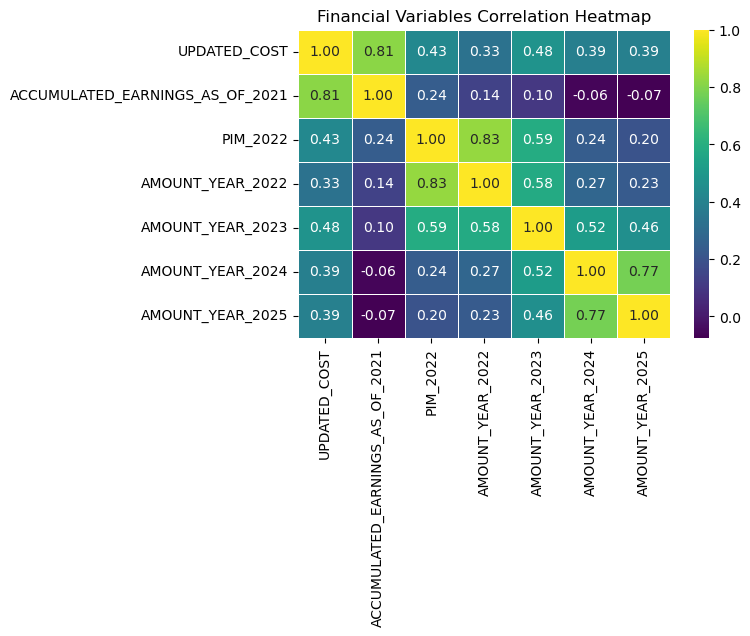

In [130]:
# Create a heatmap for financial correlations

# Select relevant financial columns for heatmap
financial_columns = ['UPDATED_COST', 'ACCUMULATED_EARNINGS_AS_OF_2021', 'PIM_2022', 'AMOUNT_YEAR_2022', 'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025']
# Create a subset of the dataframe with only financial columns
financial_df = df[financial_columns]
# Compute the correlation matrix for financial variables
financial_correlation = financial_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(financial_correlation, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Financial Variables Correlation Heatmap')
plt.show()

Strong positive relationship between "UPDATED_COST" and "ACCUMULATED_EARNINGS_AS_OF_2021," suggesting that projects with higher costs tend to have higher accumulated earnings. Similarly, there's a positive correlation between "PIM_2022" and other financial variables.

## Geospatial Analysis:

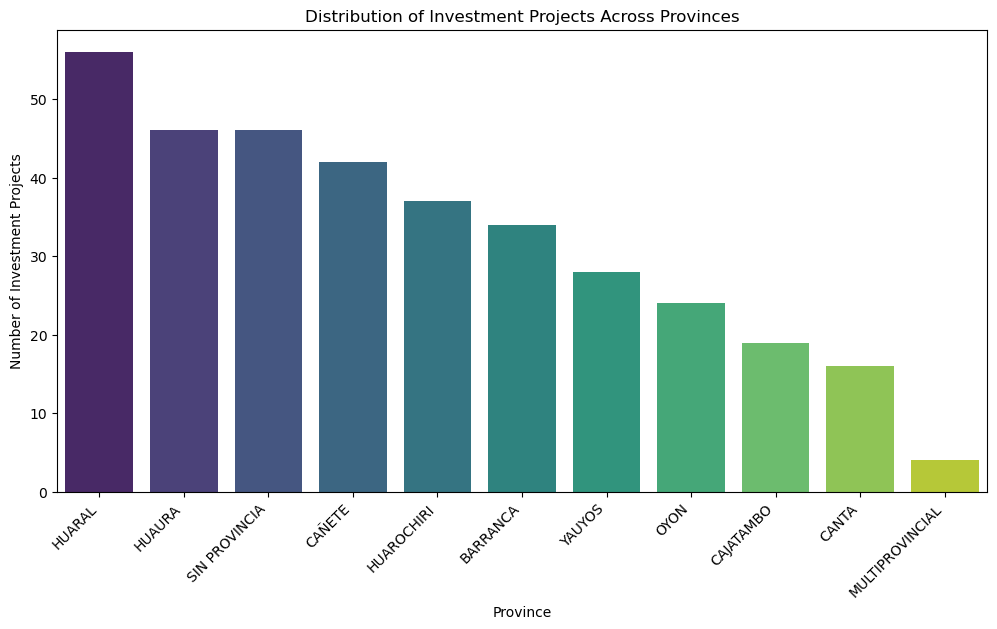

In [75]:
# 1. Understand the distribution of investment projects across different provinces.

# Count the number of projects in each province
province_counts = df['PROVINCE'].value_counts()

# Plot the distribution of investment projects across provinces
plt.figure(figsize=(12, 6))
sns.barplot(x=province_counts.index, y=province_counts.values, palette='viridis')
plt.title('Distribution of Investment Projects Across Provinces')
plt.xlabel('Province')
plt.ylabel('Number of Investment Projects')
plt.xticks(rotation=45, ha='right')
plt.show()

"HUARAL" has the highest number of projects (56), followed by "HUAURA" (46) and "SIN PROVINCIA" (46). 

In [ ]:
# Load the shapefile with region boundaries
shapefile_path = 'path/to/regions_shapefile.shp'
regions_map = gpd.read_file(shapefile_path)

# Merge investment data with the shapefile data based on the common UBIGEO column
merged_data = regions_map.merge(df, on='UBIGEO')

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='UPDATED_COST', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Geographic Distribution of Investments', fontdict={'fontsize': '16', 'fontweight': '3'})
ax.set_axis_off()

# Display the colorbar
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=merged_data['UPDATED_COST'].min(), vmax=merged_data['UPDATED_COST'].max()))
sm._A = []
fig.colorbar(sm, cax=cax)

# Show the plot
plt.show()

## Financial Trend Analysis:

In [77]:
# Cost-to-Earnings Ratio
df['Cost_to_Earnings_Ratio'] = df['UPDATED_COST'] / df['ACCUMULATED_EARNINGS_AS_OF_2021']

# Budget Execution Rate for 2022
df['Budget_Execution_Rate_2022'] = df['AMOUNT_YEAR_2022'] / df['PIM_2022']

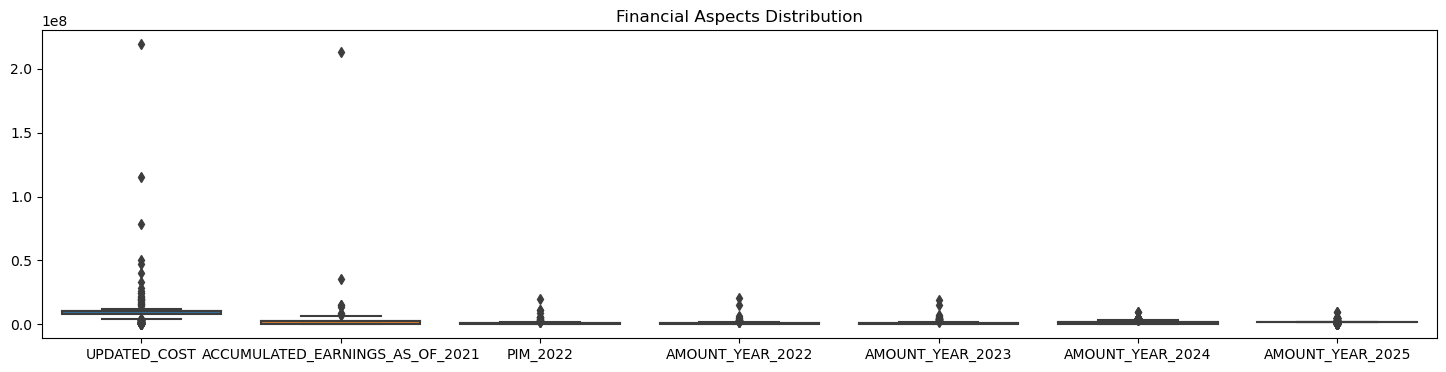

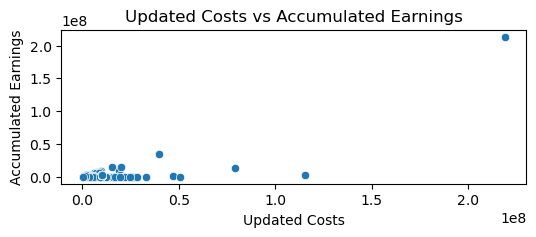

In [86]:
# Box plots for Updated Costs, Accumulated Earnings, and Planned Budgets
plt.figure(figsize=(18, 4))
sns.boxplot(data=df[['UPDATED_COST', 'ACCUMULATED_EARNINGS_AS_OF_2021', 'PIM_2022', 'AMOUNT_YEAR_2022', 'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025']])
plt.title('Financial Aspects Distribution')
plt.show()

# Scatter plot for Updated Costs vs Accumulated Earnings
plt.figure(figsize=(6, 2))
sns.scatterplot(x='UPDATED_COST', y='ACCUMULATED_EARNINGS_AS_OF_2021', data=df)
plt.title('Updated Costs vs Accumulated Earnings')
plt.xlabel('Updated Costs')
plt.ylabel('Accumulated Earnings')
plt.show()

## Unit Performance Analysis:

In [87]:
#  'Success' column indicating project success (1 for success, 0 for failure)
df['Success'] = (df['AMOUNT_YEAR_2025'] > 0).astype(int)

# Calculate success rates for Formulating Units
formulating_unit_success_rate = df.groupby('FORMULATING_UNIT')['Success'].mean().sort_values(ascending=False)

# Calculate success rates for Executing Units
executing_unit_success_rate = df.groupby('INVESTMENT_EXECUTING_UNIT')['Success'].mean().sort_values(ascending=False)

In [89]:
# Assuming 'PIM_2022' is the planned budget for the year 2022
# Calculate budget adherence for Formulating Units
df['Budget_Adherence_Formulating_Unit'] = df['AMOUNT_YEAR_2022'] / df['PIM_2022']

# Calculate budget adherence for Executing Units
df['Budget_Adherence_Executing_Unit'] = df['AMOUNT_YEAR_2022'] / df['PIM_2022']

# Average budget adherence for Formulating Units
avg_budget_adherence_formulating = df.groupby('FORMULATING_UNIT')['Budget_Adherence_Formulating_Unit'].mean().sort_values(ascending=False)

# Average budget adherence for Executing Units
avg_budget_adherence_executing = df.groupby('INVESTMENT_EXECUTING_UNIT')['Budget_Adherence_Executing_Unit'].mean().sort_values(ascending=False)

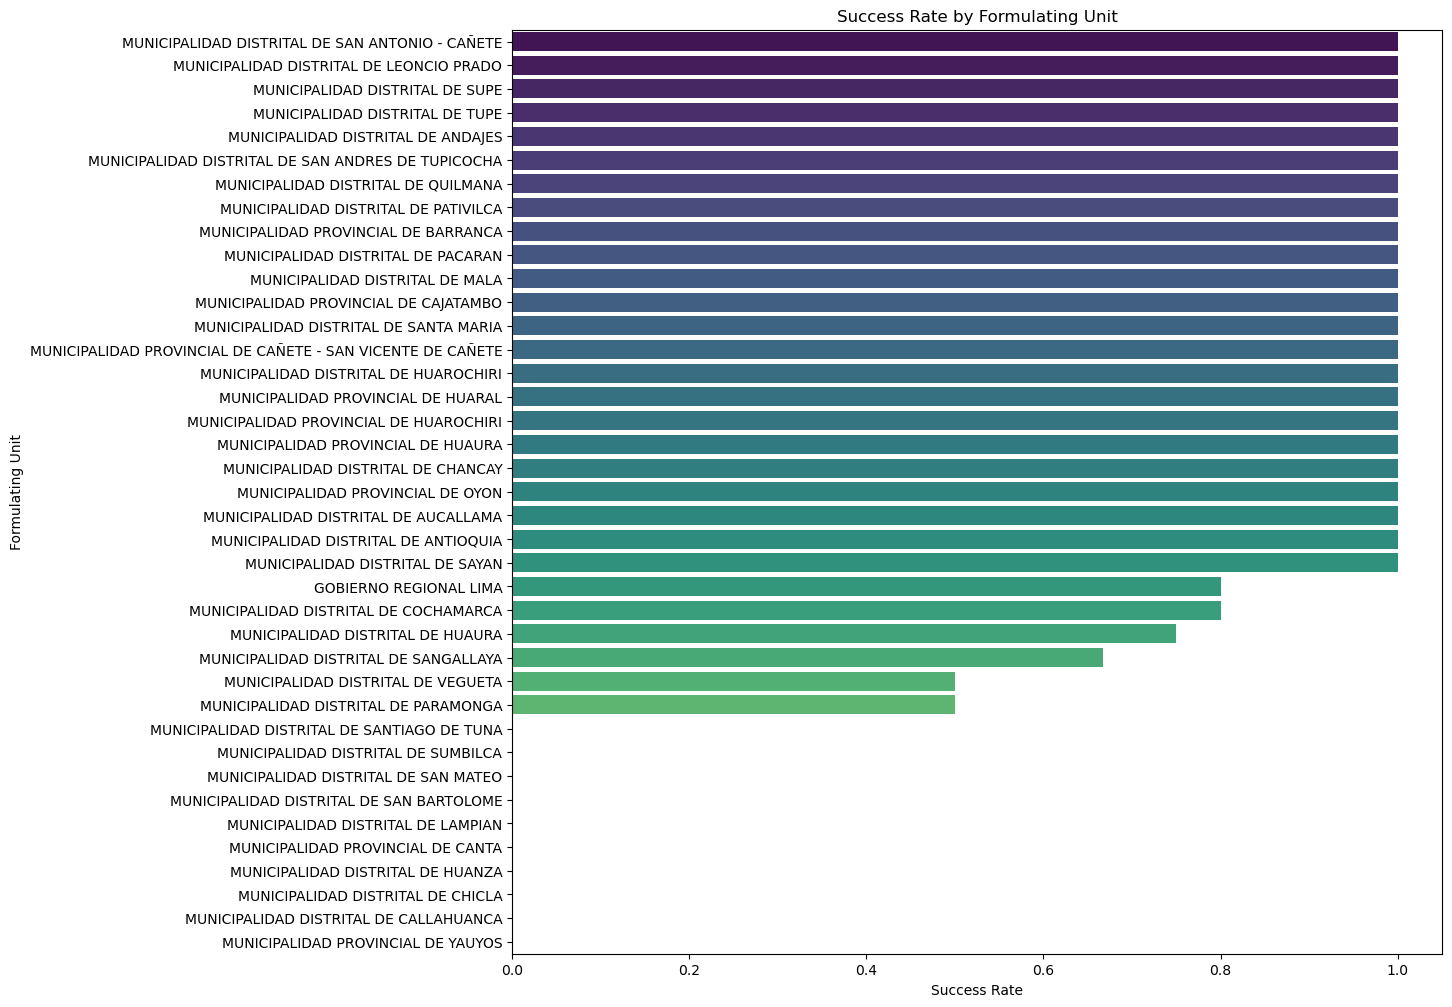

In [100]:
# Bar plot for Formulating Unit Success Rate

plt.figure(figsize=(12, 12))
sns.barplot(x=formulating_unit_success_rate.values, y=formulating_unit_success_rate.index, palette='viridis')
plt.title('Success Rate by Formulating Unit')
plt.xlabel('Success Rate')
plt.ylabel('Formulating Unit')
plt.show()

Most formulating units have a success rate of 100%, indicating high success in project implementation. However, a few units show lower success rates.

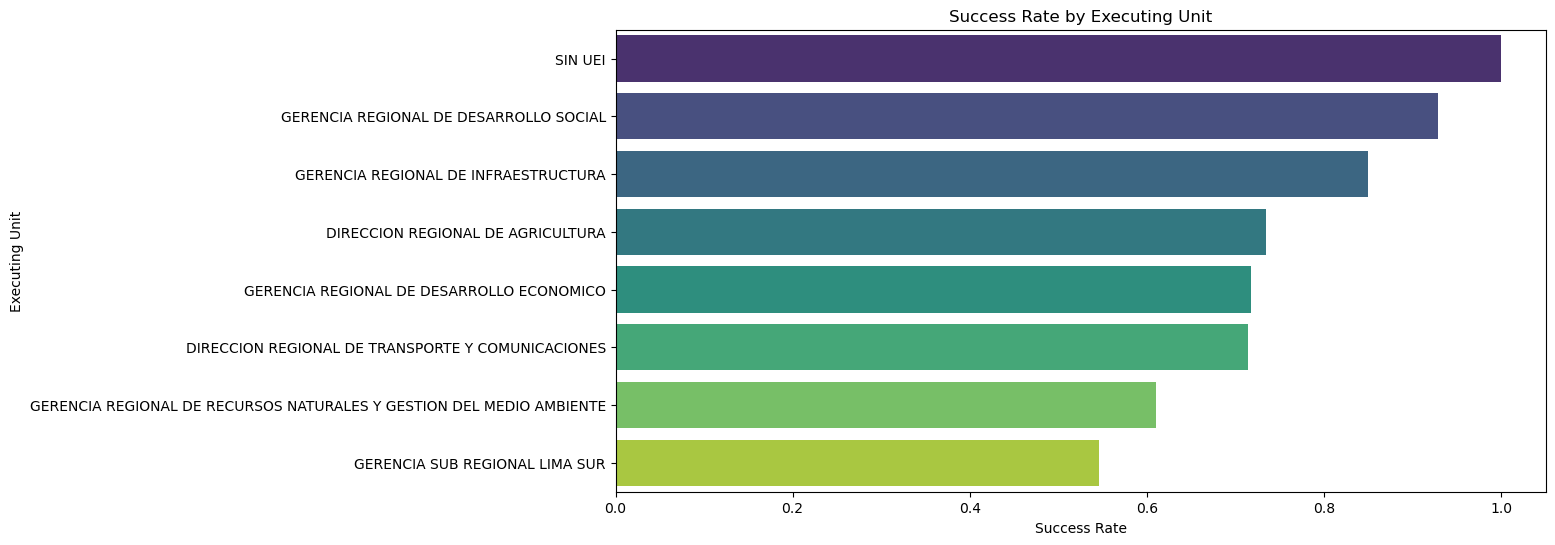

In [91]:
# Bar plot for Executing Unit Success Rate
plt.figure(figsize=(12, 6))
sns.barplot(x=executing_unit_success_rate.values, y=executing_unit_success_rate.index, palette='viridis')
plt.title('Success Rate by Executing Unit')
plt.xlabel('Success Rate')
plt.ylabel('Executing Unit')
plt.show()

'SIN UEI' and 'REGIONAL MANAGEMENT OF SOCIAL DEVELOPMENT' have high success rates, while other units vary in their success rates.

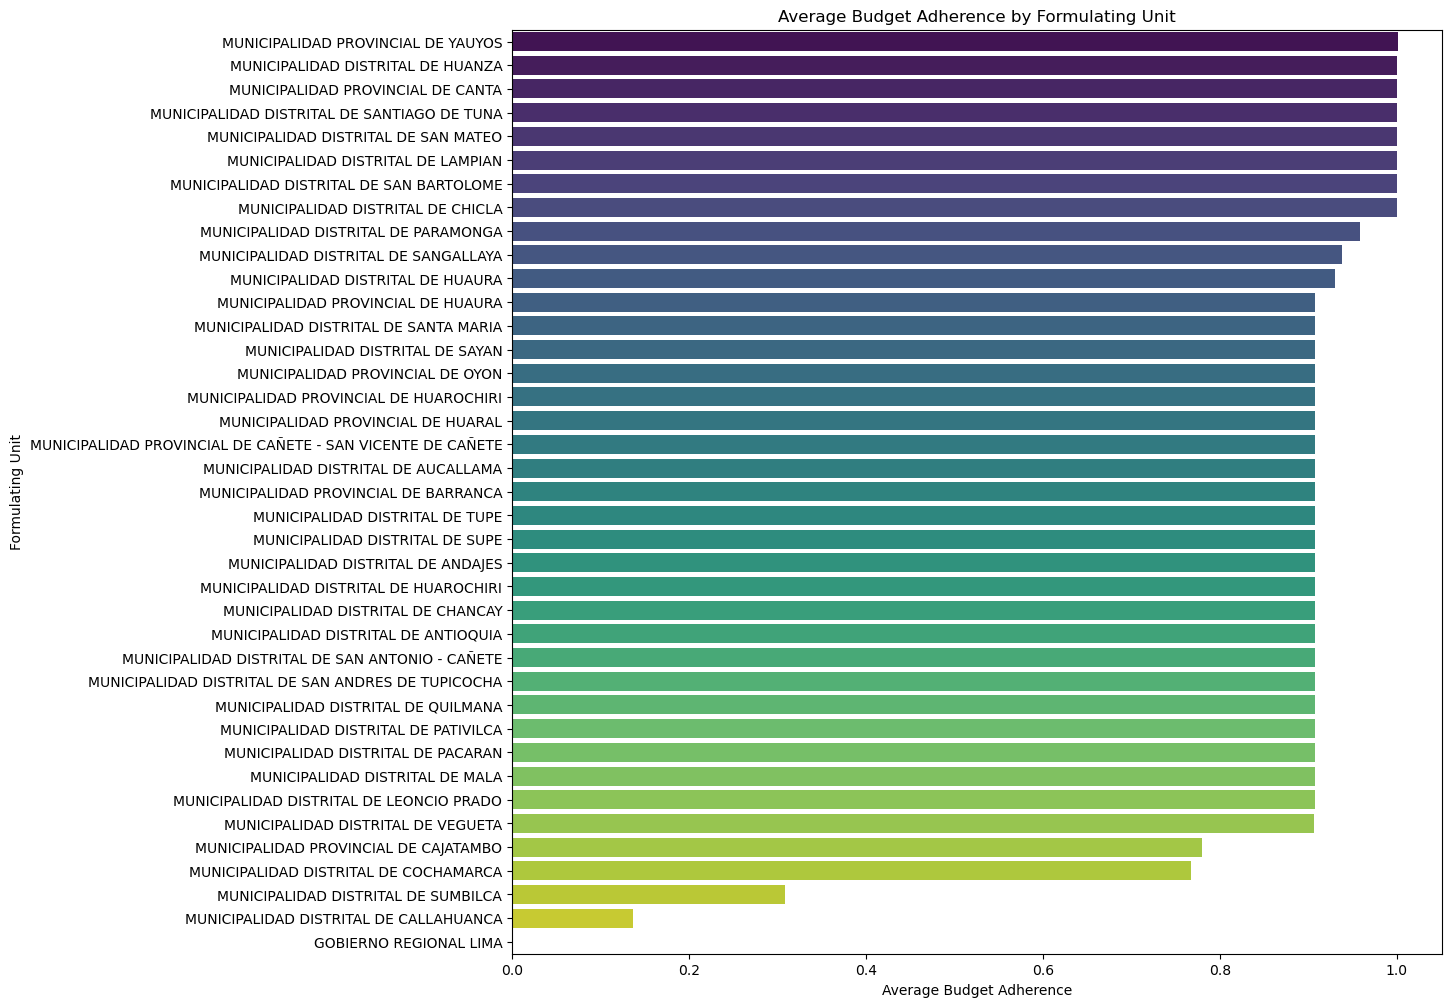

In [94]:
# Bar plot for Average Budget Adherence by Formulating Unit
plt.figure(figsize=(12, 12))
sns.barplot(x=avg_budget_adherence_formulating.values, y=avg_budget_adherence_formulating.index, palette='viridis')
plt.title('Average Budget Adherence by Formulating Unit')
plt.xlabel('Average Budget Adherence')
plt.ylabel('Formulating Unit')
plt.show()

Some units, such as 'PROVINCIAL MUNICIPALITY OF YAUYOS' and 'DISTRICT MUNICIPALITY OF HUANZA', demonstrate high budget adherence.

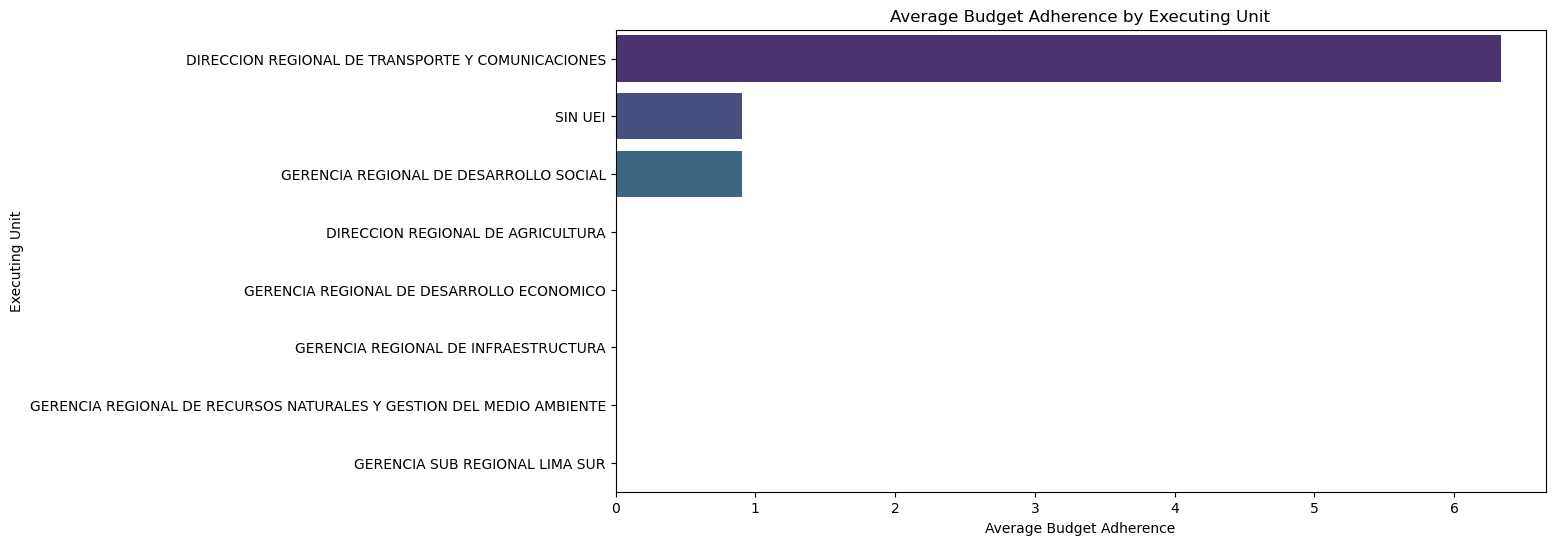

In [93]:
# Bar plot for Average Budget Adherence by Executing Unit
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_budget_adherence_executing.values, y=avg_budget_adherence_executing.index, palette='viridis')
plt.title('Average Budget Adherence by Executing Unit')
plt.xlabel('Average Budget Adherence')
plt.ylabel('Executing Unit')
plt.show()

 'REGIONAL DIRECTORATE OF TRANSPORTATION AND COMMUNICATIONS' has the highest budget adherence, while 'SIN UEI' has moderate adherence.

## Function-specific Analysis:

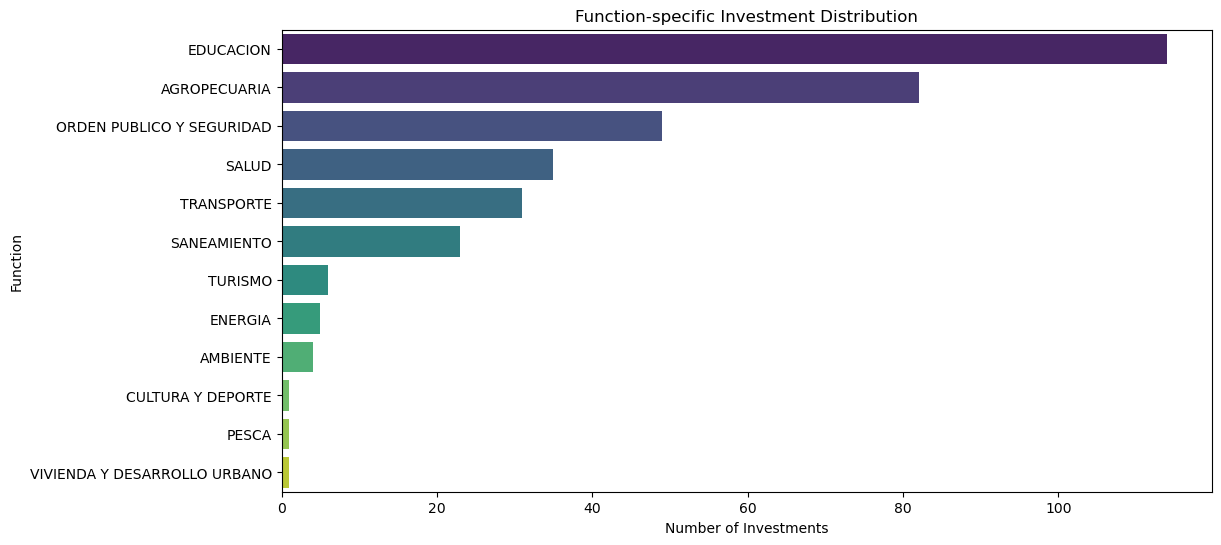

In [107]:
# Group the data by the 'FUNCTION' column and calculate the count of investments in each function
function_distribution = df.groupby('FUNCTION')['INVESTMENT_NAME'].count().sort_values(ascending=False)

# Bar plot for Function-specific Investment Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=function_distribution.values, y=function_distribution.index, palette='viridis')
plt.title('Function-specific Investment Distribution')
plt.xlabel('Number of Investments')
plt.ylabel('Function')
plt.show()

EDUCATION - 114
AGRICULTURE AND LIVESTOCK - 82
PUBLIC ORDER AND SECURITY - 49
HEALTH - 35
TRANSPORTATION - 31
SANITATION - 23
TOURISM - 6
ENERGY - 5
ENVIRONMENT - 4
CULTURE AND SPORTS - 1
FISHERIES - 1
HOUSING AND URBAN DEVELOPMENT - 1 \ 

"EDUCATION" and "AGRICULTURE AND LIVESTOCK" are the most common functions, suggesting a focus on these areas. Other functions like "PUBLIC ORDER AND SECURITY" and "HEALTH" also receive significant investments.

## Efficiency Metrics:

In [110]:
# Calculate efficiency metrics
total_amount_executed = df['AMOUNT_YEAR_2022'] + df['AMOUNT_YEAR_2023'] + df['AMOUNT_YEAR_2024'] + df['AMOUNT_YEAR_2025']
total_planned_budget = df['PIM_2022'] + df['AMOUNT_YEAR_2023'] + df['AMOUNT_YEAR_2024'] + df['AMOUNT_YEAR_2025']

df['Execution_Efficiency'] = (total_amount_executed / total_planned_budget) * 100
df['Budget_Adherence'] = ((total_planned_budget - total_amount_executed) / total_planned_budget) * 100

average_amount_executed = df[['AMOUNT_YEAR_2022', 'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025']].mean(axis=1)
average_planned_budget = df[['PIM_2022', 'AMOUNT_YEAR_2023', 'AMOUNT_YEAR_2024', 'AMOUNT_YEAR_2025']].mean(axis=1)

df['Avg_Efficiency_per_Investment'] = (average_amount_executed / average_planned_budget) * 100

C:\Users\l\AppData\Local\Temp\ipykernel_4668\1825482541.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FORMULATING_UNIT', y='Execution_Efficiency', data=df, ci=None)


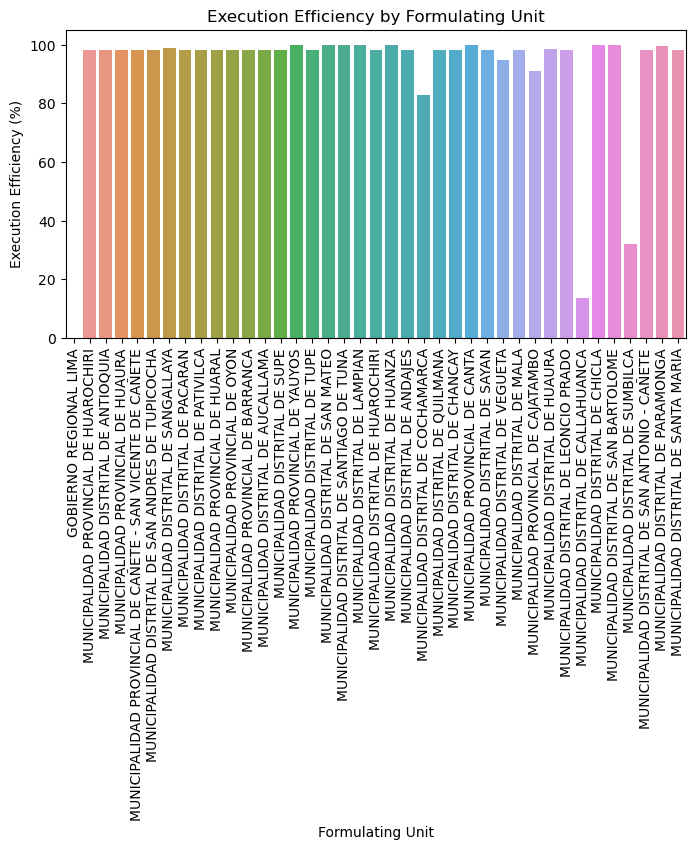

In [115]:
# Create a bar plot for Execution Efficiency
plt.figure(figsize=(8, 4))
sns.barplot(x='FORMULATING_UNIT', y='Execution_Efficiency', data=df, ci=None)
plt.title('Execution Efficiency by Formulating Unit')
plt.xlabel('Formulating Unit')
plt.ylabel('Execution Efficiency (%)')
plt.xticks(rotation=90)
plt.show()

Some units, such as "MUNICIPALIDAD DISTRITAL DE CALLAHUANCA" and "MUNICIPALIDAD DISTRITAL DE SUMBILCA," exhibit least efficiency.

C:\Users\l\AppData\Local\Temp\ipykernel_4668\2330127483.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FORMULATING_UNIT', y='Budget_Adherence', data=df, ci=None)


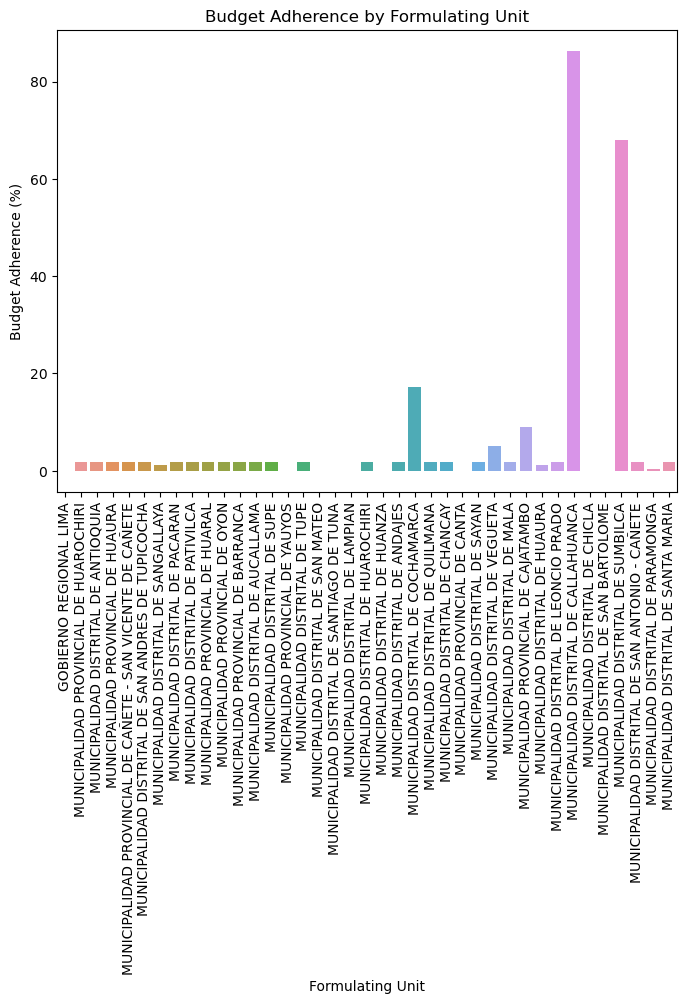

In [120]:
# Create a bar plot for Budget Adherence
plt.figure(figsize=(8, 6))
sns.barplot(x='FORMULATING_UNIT', y='Budget_Adherence', data=df, ci=None)
plt.title('Budget Adherence by Formulating Unit')
plt.xlabel('Formulating Unit')
plt.ylabel('Budget Adherence (%)')
plt.xticks(rotation=90)
plt.show()

Units like 'MUNICIPALIDAD DISTRITAL DE CALLAHUANCA' and 'MUNICIPALIDAD DISTRITAL DE SUMBILCA' exhibit high efficiency.

C:\Users\l\AppData\Local\Temp\ipykernel_4668\1397892427.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FORMULATING_UNIT', y='Avg_Efficiency_per_Investment', data=df, ci=None)


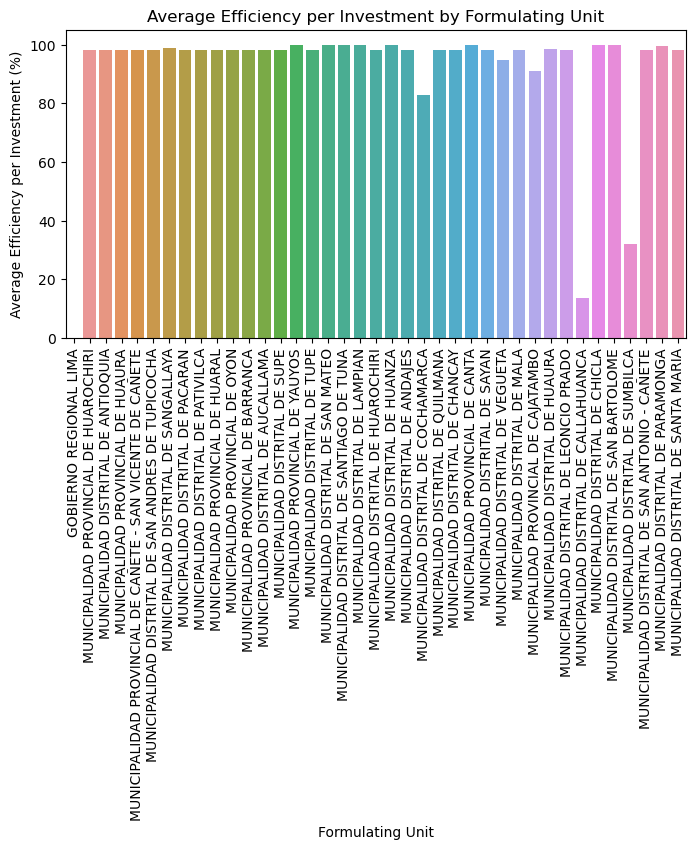

In [123]:
# Create a bar plot for Average Efficiency per Investment
plt.figure(figsize=(8, 4))
sns.barplot(x='FORMULATING_UNIT', y='Avg_Efficiency_per_Investment', data=df, ci=None)
plt.title('Average Efficiency per Investment by Formulating Unit')
plt.xlabel('Formulating Unit')
plt.ylabel('Average Efficiency per Investment (%)')
plt.xticks(rotation=90)
plt.show()

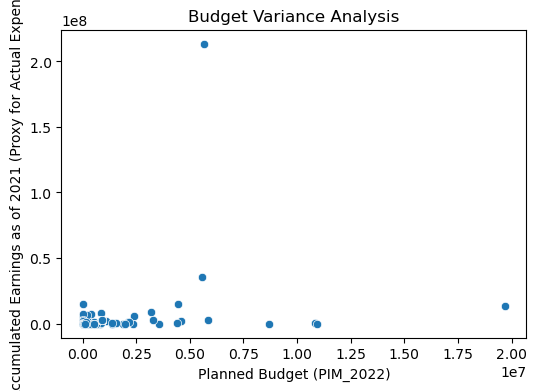

In [137]:
# Assess the efficiency of investment execution by analyzing the relationship between planned budgets and actual expenses:

# Scatter plot for budget variance analysis using ACCUMULATED_EARNINGS_AS_OF_2021
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PIM_2022', y='ACCUMULATED_EARNINGS_AS_OF_2021', data=df)
plt.title('Budget Variance Analysis')
plt.xlabel('Planned Budget (PIM_2022)')
plt.ylabel('Accumulated Earnings as of 2021 (Proxy for Actual Expenses)')
plt.show()

 Some projects have a perfect match, while others show discrepancies, indicating variations in budget execution.

### 3. Alignment with Regional Government's Strategic Goals:

The distribution of investments, as observed across different provinces, may or may not directly align with the strategic goals of the Regional Government. Analyzing the geographic concentration of projects can provide insights into whether investments are evenly spread or if specific regions receive more attention. If the concentration aligns with the government's strategic priorities, it indicates a strategic alignment. 

### 4. Common Types of Investments and Contribution to Functions:

The most common types of investments, based on the function-specific analysis, include 'EDUCATION' and 'AGRICULTURE AND LIVESTOCK.' These sectors have a substantial number of projects, suggesting a focus on enhancing education infrastructure and supporting agriculture-related initiatives. Understanding the contribution of these investments to different functions involves evaluating their impact on education, agriculture, public order and security, health, transportation, sanitation, tourism, energy, environment, culture and sports, fisheries, housing, and urban development.

### 5. Most Active and Successful Formulating and Executing Units:

- **Formulating Units:**
  - Units with a 100% success rate in project execution suggest these units effectively plan and formulate projects, ensuring successful execution.

- **Executing Units:**
  - 'SIN UEI' and 'REGIONAL MANAGEMENT OF SOCIAL DEVELOPMENT' exhibit high success rates in project execution.
  - These units play a crucial role in the successful implementation of projects, aligning with the government's goals.

### 6. Recommendations and Actionable Insights:

- **Strategic Alignment:**
  - Ensure a detailed alignment analysis between investment distribution and the government's strategic goals. Adjust investment strategies if discrepancies are identified.

- **Diversification of Investments:**
  - While 'EDUCATION' and 'AGRICULTURE AND LIVESTOCK' are vital, diversify investments across other functions to address a broader range of regional needs.

- **Knowledge Sharing:**
  - Promote knowledge sharing between successful formulating and executing units and those with lower success rates. Identify and implement best practices.

- **Capacity Building:**
  - Invest in capacity building for units with lower success rates to enhance their project planning and execution capabilities.

- **Continuous Monitoring:**
  - Implement a robust monitoring system to track the efficiency metrics continuously. This ensures prompt identification of potential issues and allows for timely corrective actions.

- **Stakeholder Engagement:**
  - Engage with stakeholders, including local communities, to gather insights on the impact of investments. This feedback can guide future project planning and execution.

By addressing these recommendations, the Regional Government can enhance the effectiveness of its investment strategy, ensure alignment with strategic goals, and improve the overall success rate of project execution.

## Conclusion:
- Investments are concentrated in provinces such as Huaral, Huaura, and Cañete.
- Formulating and executing units vary in their success rates, with some achieving a 100% success rate.
- Education and agriculture are the predominant sectors receiving investments, emphasizing the government's focus on these areas.
- Strategic alignment, diversification of investments, knowledge sharing, capacity building, and stakeholder engagement are recommended strategies.
- The Regional Government of Lima should adopt a culture of continuous improvement, leveraging data-driven insights for informed decision-making.


In conclusion, while the Regional Government of Lima has made strides in executing investment projects, there is room for refinement and optimization. The proposed recommendations provide actionable steps to enhance strategic alignment, improve efficiency, and achieve a more comprehensive impact across various sectors. Through proactive measures and a commitment to continuous improvement, the government can elevate the success and impact of its investment initiatives for the betterment of the region and its communities.
